### 実践1 単回帰

In [255]:
import matplotlib.pyplot as plt
import numpy as np

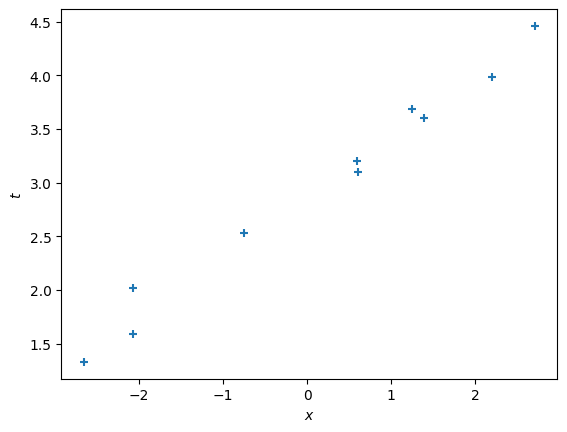

In [256]:
# 正解データの生成
a0, a1 = 3, 0.5
np.random.seed(42)
n = 10
x_data = 6 * np.random.rand(n) - 3
t_data = a1 * x_data + a0 + np.random.normal(0, 0.2, n)

fig, ax = plt.subplots()
ax.scatter(x_data, t_data, marker="+")
plt.xlabel("$x$")
plt.ylabel("$t$")
plt.show()

In [257]:
# 最尤解の計算

X_data = np.stack((np.ones(n), x_data), axis=1)
c = np.linalg.pinv(X_data) @ t_data

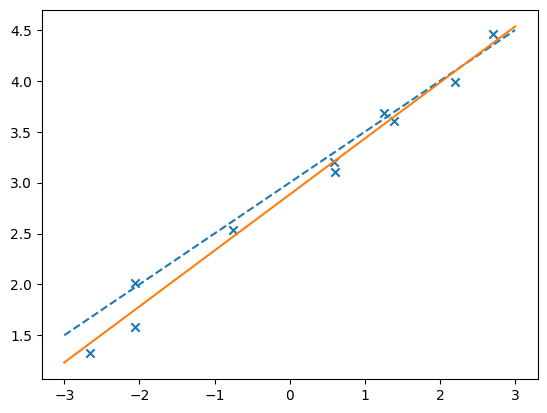

In [258]:
# 学習結果の描画
x = np.linspace(-3, 3, 100)
t = a0 + a1 * x
y = c[0] + c[1] * x

fig, ax = plt.subplots()
ax.plot(x, t, linestyle="--")
ax.plot(x, y)
ax.scatter(x_data, t_data, marker="x")

### 実践2 重回帰

In [259]:
# 正解データの生成
a0, a1, a2 = 2, 0.3, -0.5

np.random.seed(42)
n = 20
x_data = 6 * np.random.rand(n, 2) - 3
t_data = a0 + a1*x_data[:, 0] + a2*x_data[:, 1] + np.random.normal(0, 0.2, n)

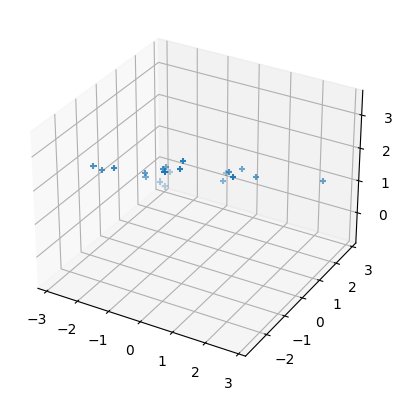

In [260]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x_data[:, 0], x_data[:, 1], t_data, marker="+")

In [261]:
# 最尤解の計算
X_data = np.stack((np.ones(n), x_data[:, 0], x_data[:, 1]), axis=1)
c = np.linalg.pinv(X_data) @ t_data
c

array([ 1.91140644,  0.26521894, -0.54880479])

In [262]:
# 学習結果
x_1 = x_2 = np.linspace(-3, 3, 100)
X_1, X_2 = np.meshgrid(x_1, x_2)
pos = np.c_[X_1.ravel(), X_2.ravel()]

t = a0 + a1*pos[:, 0] + a2*pos[:, 1]
t = t.reshape(X_1.shape)
y = c[0] + c[1]*pos[:, 0] + c[2]*pos[:, 1]
y = y.reshape(X_1.shape)

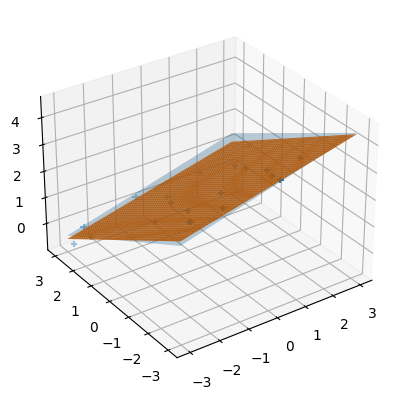

In [263]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x_data[:, 0], x_data[:, 1], t_data, marker="+")
ax.plot_surface(X_1, X_2, t, alpha=0.3)
ax.plot_surface(X_1, X_2, y)
ax.view_init(azim=235)

### 実践3 線形サポートベクトルマシン

In [264]:
# 訓練データの生成
np.random.seed(42)
n = 100
x1_data = -5 + 10 * np.random.rand(n)
x2_data = -5 + 10 * np.random.rand(n)
t_data = np.empty(0)

D_plus = D_minus = np.empty(0)

for i in range(n):
    if x1_data[i] >= 1.5*x2_data[i]:
        D_plus = np.append(D_plus, [x1_data[i], x2_data[i]])
        t_data = np.append(t_data, 1)
    else:
        D_minus = np.append(D_minus, [x1_data[i], x2_data[i]])
        t_data = np.append(t_data, -1)

D_plus = D_plus.reshape(-1, 2).T
D_minus = D_minus.reshape(-1, 2).T


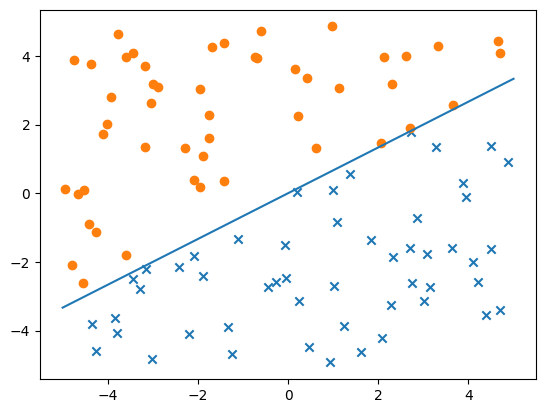

In [265]:
# 訓練データと生成に用いた境界の描画
x1 = np.linspace(-5, 5, 100)
x2 = (1/1.5)*x1

fig, ax = plt.subplots()
ax.scatter(D_plus[0], D_plus[1], marker="x")
ax.scatter(D_minus[0], D_minus[1], marker="o")
ax.plot(x1, x2)

In [266]:
import cvxpy as cp

c = cp.Variable(3)
H = np.diag([2, 2, 0])
A = np.diag(t_data) @ np.vstack((x1_data, x2_data, np.ones(n))).T
b = np.ones(n)
cons = [A @ c >= b]
obj = cp.Minimize(cp.quad_form(c, H))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

809.7148808776055

In [267]:
c = c.value
cons = A @ c - 1
sv_index = (np.where(np.abs(cons) < 1e-7))[0].tolist()
sv = np.array([x1_data[sv_index], x2_data[sv_index]])
sv

array([[-3.15145544,  2.72244769,  2.06857344],
       [-2.21353536,  1.77564362,  1.4517279 ]])

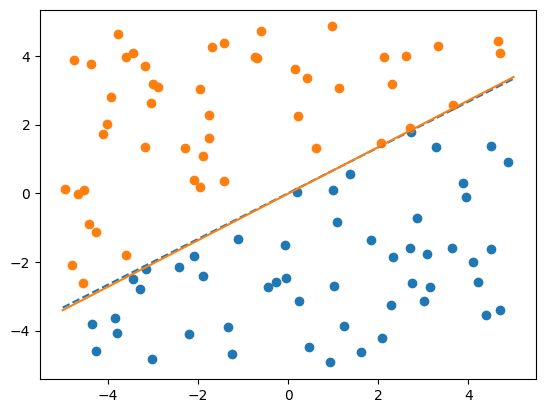

In [268]:
x2_sol = -(c[0] / c[1]) * x1 - (c[2] / c[1])

fig, ax = plt.subplots()
ax.plot(x1, x2, ls="--")
ax.plot(x1, x2_sol)
ax.scatter(D_plus[0], D_plus[1])
ax.scatter(D_minus[0], D_minus[1])

### 実践4 多項式回帰

In [269]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [270]:
np.random.rand(42)
n = 100
d = 7
x_data = 6 * np.random.rand(n) - 3
t_data = 1 - 1.5 * x_data + np.sin(x_data) + np.cos(3*x_data) + np.random.normal(0, 0.2, n)

x = np.linspace(-3, 3, 100)
t = 1 - 1.5 * x + np.sin(x) + np.cos(3*x)

In [271]:
def calc_design_matrix(x, n, d):
    design_matrix = np.ones(shape=(n, d+1))
    for i in range(d):
        for j in range(n):
            design_matrix[j, i+1] = x[j] ** (i+1)
    return design_matrix

def mult(x, d):
    return np.array([x**i for i in range(d+1)])

In [272]:
design_matrix = calc_design_matrix(x_data, n, d)
c = np.linalg.pinv(design_matrix) @ t_data
xi = mult(x, d)
y_sol = c @ xi

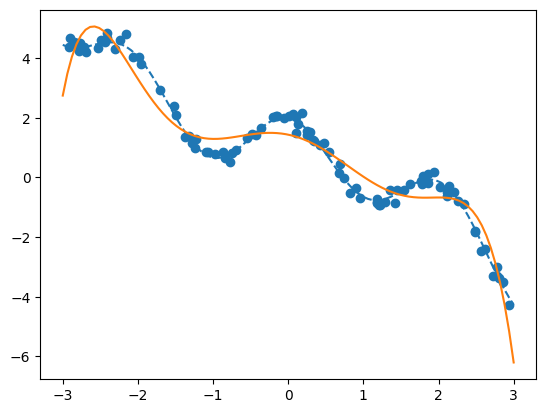

In [273]:
fig, ax = plt.subplots()
ax.plot(x, t, ls="--")
ax.plot(x, y_sol)
ax.scatter(x_data, t_data)


### 実践5 ガウスカーネル回帰

In [274]:
import numpy as np

In [275]:
def gaussian_kernel_func(x1, x2):
    gamma = 1/2
    k = np.exp(-gamma*np.sum((x1 - x2)**2))
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            K[i,j] = gaussian_kernel_func(x1[i], x2[j])
    return K

In [276]:
n = 15
x_data = 6 * np.random.rand(n) - 3
t_data = 1 - 1.5 * x_data + np.sin(x_data) + np.cos(3*x_data)
K = kernel_matrix(x_data, x_data)
c = np.linalg.pinv(K) @ t_data

In [277]:
x = np.linspace(-3, 3, 100)
k_s = kernel_matrix(x, x_data)
y_sol = k_s @ c
y = 1 - 1.5 * x + np.sin(x) + np.cos(3*x)

0.0004974964204830578


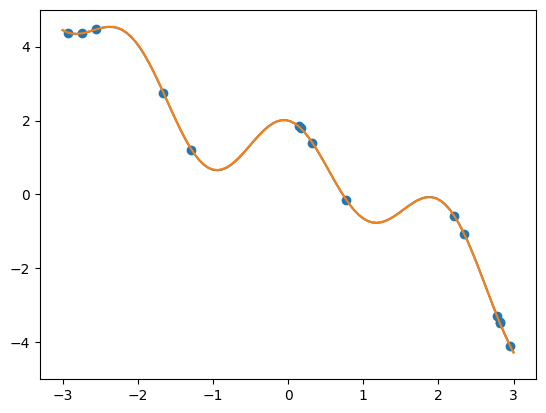

In [278]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_sol)
ax.scatter(x_data, t_data)
ax.set_ylim(-5, 5)

L = np.linalg.norm(K @ c - t_data) ** 2
print(L)

### 実践7 サポートベクトルマシン

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [280]:
# 境界を表す関数を設定
def true_func(x1, x2):
    return 16 + 16*x1 + 18*x2 + 4*x1**2 + 9*x2**2

# 多項基底関数
def mult_kernel_func(x1, x2, dim):
    x1d = x2d = 0
    for d in range(dim):
        x1d = np.hstack((x1d, x1**(d+1)))
        x2d = np.hstack((x2d, x2**(d+1)))
    return x1d @ x2d

def gaussian_kernel_func(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

def mult_kernel_matrix(x1, x2, dim):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            K[i,j] = mult_kernel_func(x1[i], x2[j], dim)
    return K

def gaussian_kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            K[i,j] = gaussian_kernel_func(x1[i], x2[j], gamma=0.5)
    return K

(2, 100)
(100,)


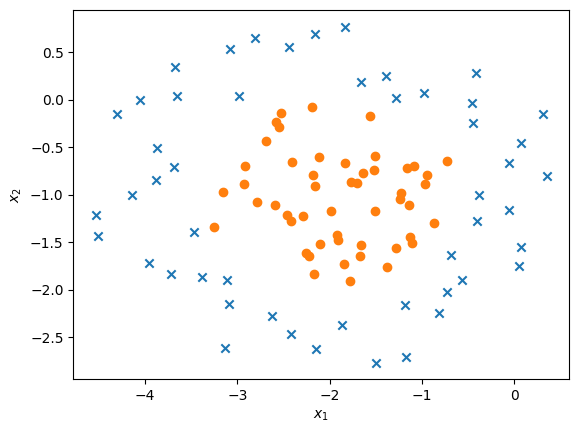

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [281]:
np.random.seed(42)
N_minus = 50
r1 = np.sqrt(0.9*np.random.rand(N_minus)) 
t1 = 2*math.pi*np.random.rand(N_minus) 
x_minus_data = np.array([1.5*r1*np.cos(t1)-2, r1*np.sin(t1)-1]) 
N_plus = 50
r2 = np.sqrt(2*1.1*np.random.rand(N_plus)+1.1) 
t2 = np.arange(N_plus)*2*np.pi/N_plus
x_plus_data  = np.array([1.5*r2*np.cos(t2)-2, r2*np.sin(t2)-1]) 
x_data  = np.hstack((x_plus_data, x_minus_data))
print(x_data.shape)

lam_data = np.hstack((np.ones(N_plus), -np.ones(N_minus)))
print(lam_data.shape)

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

In [282]:
N = N_plus + N_minus
c = cp.Variable(N)
v0 = cp.Variable(1)
K = gaussian_kernel_matrix(x_data.T, x_data.T)
cons = [np.diag(lam_data)@(K @ c + v0*np.ones(N)) >= np.ones(N)]
Kcost = cp.Parameter(shape=K.shape, value=K, PSD=True)
obj = cp.Minimize(cp.quad_form(c, Kcost))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

c = c.value
v0 = v0.value
cons = np.diag(lam_data) @ (K @ c + v0*np.ones(N)) - 1
sv_index = (np.where(np.abs(cons) < 1e-7))[0].tolist()
sv = x_data[:,sv_index] 

c:\Users\kirit\OneDrive\Documents\PRML\.venv\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:213: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


-3.7593585845802826
0.7888967455242228
43.65351019023575
16.606423349996888


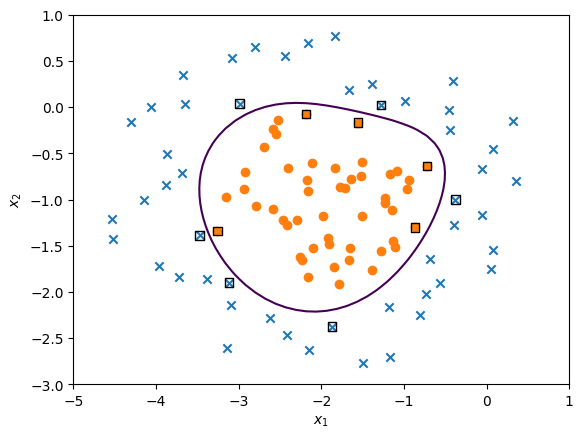

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [283]:
x1 = np.linspace(-5, 1, 50)
x2 = np.linspace(-3, 1, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

kx = gaussian_kernel_matrix(X, x_data.T)
f = kx @ c + v0

v1 = 0
v2 = 0
v3 = 0
v4 = 0
for i in range(N):
  v1 += c[i]*x_data[0,i]
  v2 += c[i]*x_data[1,i]
  v3 += c[i]*x_data[0,i]**2
  v4 += c[i]*x_data[1,i]**2

print(v1)
print(v2)
print(v3)
print(v4)

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
ax.scatter(sv[0], sv[1], marker='s', color='k', fc='none')
plt.contour(X1, X2, f.reshape(X1.shape), [0])
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()